In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as krs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from Solver.SolverSWCC import *
from Solver.BimodalSWCC import *
import seaborn as sns
import keras_tuner as kt

In [2]:
bim = BimodalSWCC()

x_value = 10**np.linspace(-2, 6, 200)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
df_data = pd.read_excel('BD_GO_Solos v9.xlsx', sheet_name='CCSA')

In [4]:
df_data = df_data.dropna()

In [5]:
#coleta dos dados

#cg = df_data[['% Pedregulho', '% Areia', '% Silte', '% Argila']].values

#ccsa_bim = df_data[['yb1_bim', 'yres1_bim', 'Sres1_bim', 'yb2_bim', 'Sb_bim', 'yres2_bim', 'Sres2_bim', 'a_bim']].values

#dataset = df_data[['CG - com defloculante', 'CG - sem defloculante', 'CCSA', '% Areia cd', '% Silte cd', '% Argila cd', '% Areia sd', '% Silte sd', '% Argila sd', 'LL', 'IP', 'yb1_bim', 'yres1_bim', 'Sres1_bim', 'yb2_bim', 'Sb_bim', 'yres2_bim', 'Sres2_bim', 'a_bim']]

#dataset.tail()

In [5]:
dic = pd.DataFrame({"Código":np.unique(df_data["Código"].values)})

cod_train = dic.sample(frac=0.8, random_state=0)

cod_test = dic.drop(cod_train.index)

cod_test

,Código
0,10_1_1_UnB_Tese_Ayala (2020)
3,12_1_1_UnB_Tese_Queiroz (2015)
9,15_1_6_UnB_Tese_Carvalho (2013)
19,18_1_3_UnB_Tese_Luiz (2012)
21,18_1_5_UnB_Tese_Luiz (2012)
23,18_1_7_UnB_Tese_Luiz (2012)
36,2_1_1_UFG_Dissertação_Freitas (2019)
39,5_1_1_UFG_Dissertação_Dias (2014)
44,6_0_5_UFG_Dissertação_Diemer (2014)
47,6_1_3_UFG_Dissertação_Diemer (2014)


In [6]:
cod_train = cod_train.values
cod_test = cod_test.values

array(['6_1_1_UFG_Dissertação_Diemer (2014)',
       '24_1_2_UnB_Dissertação_Aguiar (2010)',
       '6_0_1_UFG_Dissertação_Diemer (2014)',
       '19_1_1_UnB_Tese_Angelim (2011)', '16_1_5_UnB_Tese_Jesus (2013)',
       '11_2_1_UnB_Tese_Mendes (2019)',
       '23_1_1_UnB_Dissertação_Matos (2011)',
       '6_0_4_UFG_Dissertação_Diemer (2014)',
       '6_1_2_UFG_Dissertação_Diemer (2014)',
       '21_1_2_UnB_Dissertação_Lopera (2016)',
       '13_1_1_UnB_Tese_Aguiar (2014)', '16_1_4_UnB_Tese_Jesus (2013)',
       '20_1_1_UnB_Dissertação_Neto (2020)',
       '18_1_6_UnB_Tese_Luiz (2012)',
       '22_1_1_UnB_Dissertação_Grau (2014)',
       '6_1_5_UFG_Dissertação_Diemer (2014)',
       '4_0_1_UFG_Dissertação_Gomes (2015)',
       '15_1_3_UnB_Tese_Carvalho (2013)', '17_1_2_UnB_Tese_Farias (2012)',
       '19_1_2_UnB_Tese_Angelim (2011)',
       '25_1_2_UnB_Dissertação_Silva (2009)',
       '7_1_1_UFG_Dissertação_Almeida (2014)',
       '18_1_2_UnB_Tese_Luiz (2012)',
       '8_1_1_UFG_Dissert

In [7]:
df_data["Suc (kPa)"] = np.log(df_data["Suc (kPa)"].values)

In [8]:
df_data["Sat"] = df_data["Sat"].values/100

In [9]:
df_train = df_data[df_data["Código"].isin(cod_train.reshape(1,-1)[0])]

df_train

,ID,Curva,Solo,Universidade,Trabalho,Autores,Código,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,Suc (kPa),Sat
116,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.49142,0.225566,0.283014,0.571031,0.428969,0.000000,0.360,0.100,1.396858,0.711249
117,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.49142,0.225566,0.283014,0.571031,0.428969,0.000000,0.360,0.100,2.305770,0.486570
118,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.49142,0.225566,0.283014,0.571031,0.428969,0.000000,0.360,0.100,2.640635,0.458351
119,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.49142,0.225566,0.283014,0.571031,0.428969,0.000000,0.360,0.100,2.985071,0.436274
120,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.49142,0.225566,0.283014,0.571031,0.428969,0.000000,0.360,0.100,3.396473,0.425257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,6,1,5,UFG,Dissertação,Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.55802,0.206650,0.235330,0.652199,0.276333,0.071468,0.385,0.194,8.818186,0.203800
1212,6,1,5,UFG,Dissertação,Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.55802,0.206650,0.235330,0.652199,0.276333,0.071468,0.385,0.194,7.889834,0.395000
1213,6,1,5,UFG,Dissertação,Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.55802,0.206650,0.235330,0.652199,0.276333,0.071468,0.385,0.194,8.174703,0.333000
1214,6,1,5,UFG,Dissertação,Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.55802,0.206650,0.235330,0.652199,0.276333,0.071468,0.385,0.194,8.605204,0.256100


In [10]:
df_test = df_data[df_data["Código"].isin(cod_test.reshape(1,-1)[0])]

df_test

,ID,Curva,Solo,Universidade,Trabalho,Autores,Código,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,Suc (kPa),Sat
72,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,1.443622,0.829318
73,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,1.682759,0.780625
74,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,2.554915,0.687340
75,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,3.680267,0.649411
76,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,5.185434,0.577652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,2.197225,0.475100
1184,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,3.761200,0.592500
1185,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,6.033086,0.266600
1186,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,8.289288,0.115000


In [11]:
dataset = df_data

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.tail()

,ID,Curva,Solo,Universidade,Trabalho,Autores,Código,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,Suc (kPa),Sat
738,18,1,6,UnB,Tese,Luiz (2012),18_1_6_UnB_Tese_Luiz (2012),0.053033,0.141728,0.805239,0.582210,0.157955,0.25914,0.400,0.140,9.355263,0.130312
131,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.00000,0.360,0.100,9.270937,0.128556
216,6,0,3,UFG,Dissertação,Diemer (2014),6_0_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.00000,0.287,0.134,1.098612,1.006100
255,6,0,4,UFG,Dissertação,Diemer (2014),6_0_4_UFG_Dissertação_Diemer (2014),0.557404,0.207608,0.234988,0.651524,0.348476,0.00000,0.289,0.111,3.401197,0.527300
258,6,0,4,UFG,Dissertação,Diemer (2014),6_0_4_UFG_Dissertação_Diemer (2014),0.557404,0.207608,0.234988,0.651524,0.348476,0.00000,0.289,0.111,4.382027,0.459400


In [13]:
test_dataset

,ID,Curva,Solo,Universidade,Trabalho,Autores,Código,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,Suc (kPa),Sat
81,2,1,1,UFG,Dissertação,Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.0,0.340,0.160,6.739831,0.206048
117,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.0,0.360,0.100,2.305770,0.486570
125,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.0,0.360,0.100,7.472239,0.291746
129,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.0,0.360,0.100,9.175259,0.159253
134,4,0,1,UFG,Dissertação,Gomes (2015),4_0_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.0,0.360,0.100,10.256388,0.036529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,1.791759,0.486600
1185,6,1,3,UFG,Dissertação,Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.0,0.287,0.134,6.033086,0.266600
1192,6,1,4,UFG,Dissertação,Diemer (2014),6_1_4_UFG_Dissertação_Diemer (2014),0.557404,0.207608,0.234988,0.651524,0.348476,0.0,0.289,0.111,3.258097,0.416100
1196,6,1,4,UFG,Dissertação,Diemer (2014),6_1_4_UFG_Dissertação_Diemer (2014),0.557404,0.207608,0.234988,0.651524,0.348476,0.0,0.289,0.111,8.163371,0.219600


In [14]:
rnaTrain = train_dataset[train_dataset.columns[7:17]]

In [15]:
rnaTrain

,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,Suc (kPa),Sat
1090,0.535831,0.231639,0.232530,0.665133,0.334867,0.00000,0.332,0.112,1.359434,0.837339
1112,0.535831,0.231639,0.232530,0.665133,0.334867,0.00000,0.332,0.112,2.120898,0.577362
183,0.611363,0.172658,0.215979,0.719253,0.280747,0.00000,0.472,0.090,2.302585,0.585600
414,0.513055,0.214210,0.272735,0.838328,0.161672,0.00000,0.390,0.100,10.629204,0.170112
503,0.448120,0.184927,0.366953,0.621780,0.378054,0.00000,0.420,0.180,0.684187,0.827869
...,...,...,...,...,...,...,...,...,...,...
738,0.053033,0.141728,0.805239,0.582210,0.157955,0.25914,0.400,0.140,9.355263,0.130312
131,0.491420,0.225566,0.283014,0.571031,0.428969,0.00000,0.360,0.100,9.270937,0.128556
216,0.609855,0.172732,0.217413,0.720008,0.279992,0.00000,0.287,0.134,1.098612,1.006100
255,0.557404,0.207608,0.234988,0.651524,0.348476,0.00000,0.289,0.111,3.401197,0.527300


In [16]:
inputRNA_train = rnaTrain.iloc[:, [0,1,2,3,4,5,6,7,9]].values

outputRNA_train = rnaTrain.iloc[:, [8]].values

In [17]:
inputRNA_train

array([[0.53583065, 0.23163935, 0.23253   , ..., 0.332     , 0.112     ,
        0.83733902],
       [0.53583065, 0.23163935, 0.23253   , ..., 0.332     , 0.112     ,
        0.57736224],
       [0.61136271, 0.17265833, 0.21597896, ..., 0.472     , 0.09      ,
        0.5856    ],
       ...,
       [0.60985521, 0.17273193, 0.21741286, ..., 0.287     , 0.134     ,
        1.0061    ],
       [0.55740428, 0.20760809, 0.23498763, ..., 0.289     , 0.111     ,
        0.5273    ],
       [0.55740428, 0.20760809, 0.23498763, ..., 0.289     , 0.111     ,
        0.4594    ]])

In [18]:
import catboost
from catboost import CatBoostRegressor, Pool
from catboost import cv

In [19]:
rnaTest = test_dataset[test_dataset.columns[7:17]]

inputRNA_test = rnaTest.iloc[:, [0,1,2,3,4,5,6,7,9]].values
outputRNA_test = rnaTest.iloc[:, [8]].values

In [20]:
params = {
    'iterations': 800,
    'learning_rate': 0.01,
    'depth': 10,
    'loss_function': 'RMSE'
}

# Criando o modelo CatBoost
model = CatBoostRegressor(**params, l2_leaf_reg=0.1, bootstrap_type="Bayesian")

# Treinando o modelo
model.fit(inputRNA_train, outputRNA_train, eval_set=(inputRNA_test, outputRNA_test), verbose=100)
#cv_data = cv(pool=train_pool, params=model.get_params(), fold_count=5, shuffle=True, partition_random_seed=42)


0:	learn: 3.3496226	test: 3.3832410	best: 3.3832410 (0)	total: 166ms	remaining: 2m 12s
100:	learn: 1.6597770	test: 1.8344389	best: 1.8344389 (100)	total: 1.04s	remaining: 7.19s
200:	learn: 1.0317881	test: 1.2898944	best: 1.2898944 (200)	total: 1.94s	remaining: 5.77s
300:	learn: 0.8006428	test: 1.1017215	best: 1.1017215 (300)	total: 2.73s	remaining: 4.53s
400:	learn: 0.7033967	test: 1.0273517	best: 1.0273517 (400)	total: 3.67s	remaining: 3.65s
500:	learn: 0.6509422	test: 0.9948711	best: 0.9948711 (500)	total: 4.49s	remaining: 2.68s
600:	learn: 0.6130305	test: 0.9728588	best: 0.9728588 (600)	total: 5.3s	remaining: 1.75s
700:	learn: 0.5809595	test: 0.9585958	best: 0.9582963 (698)	total: 6.11s	remaining: 862ms
799:	learn: 0.5456555	test: 0.9492379	best: 0.9488875 (793)	total: 6.93s	remaining: 0us

bestTest = 0.9488875185
bestIteration = 793

Shrink model to first 794 iterations.


In [21]:
y_pred = model.predict(inputRNA_test)

In [22]:
y_pred_train = model.predict(inputRNA_train)

In [23]:
r2_test = metrics.r2_score(y_pred=y_pred, y_true=outputRNA_test)
r2_train = metrics.r2_score(y_pred=y_pred_train, y_true=outputRNA_train)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

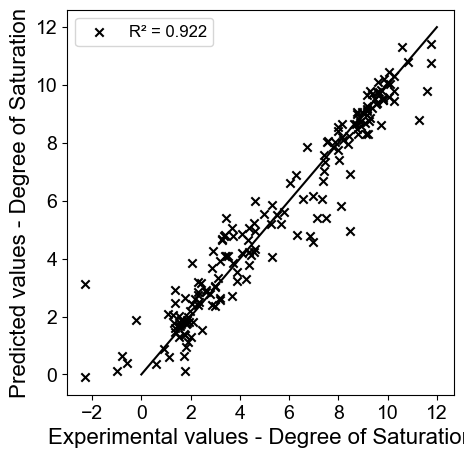

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(outputRNA_test, y_pred, color="black", marker="x", zorder=3, label=f'R² = {r2_test:.3f}')
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)

xy = np.linspace(0, 12, 50)
ax.plot(xy, xy, color='black')

plt.xlabel("Experimental values - Degree of Saturation", fontsize=16)
plt.ylabel("Predicted values - Degree of Saturation", fontsize=16)
 
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

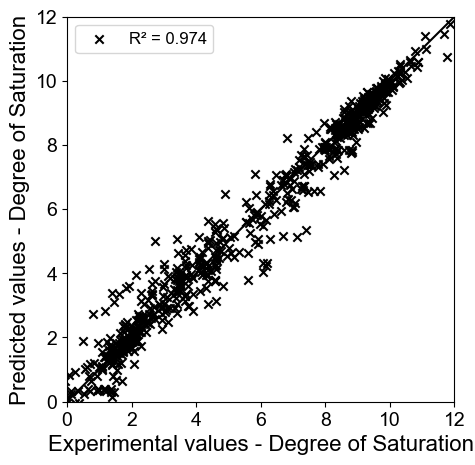

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(outputRNA_train, y_pred_train, color="black", marker="x", zorder=3, label=f'R² = {r2_train:.3f}')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

xy = np.linspace(0, 12, 50)
ax.plot(xy, xy, color='black')

plt.xlabel("Experimental values - Degree of Saturation", fontsize=16)
plt.ylabel("Predicted values - Degree of Saturation", fontsize=16)
 
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)